# Long Short-Term Memory (LSTM)

## 1. LSTM là gì?

LSTM là một loại mạng nơ-ron hồi quy (Recurrent Neural Network - RNN) đặc biệt, được thiết kế để xử lý dữ liệu dạng chuỗi (sequence) như văn bản, âm thanh, hoặc chuỗi thời gian. Khác với RNN thông thường dễ bị mất thông tin dài hạn (vấn đề vanishing gradient), LSTM có khả năng "nhớ" thông tin quan trọng từ xa trong chuỗi nhờ các cổng (gates).

**Ví dụ**: Khi chúng ta đọc một câu dài như "Tôi đã gặp một người bạn cũ, người mà tôi không gặp từ hồi tiểu học, và chúng tôi đã trò chuyện rất vui", bạn vẫn nhớ "người bạn cũ" ở đầu câu khi phân tích ý nghĩa cuối câu. LSTM cũng làm tương tự với dữ liệu chuỗi.

**Ví dụ cụ thể**: Dự đoán từ tiếp theo trong câu "Tôi thích nghe nhạc...", LSTM sẽ dựa vào cả "thích" và "nghe" để đoán "và" hoặc "pop" thay vì chỉ dựa vào từ cuối cùng.


## 2. Các thành phần chính của LSTM

LSTM hoạt động bằng cách sử dụng ba cổng chính: **Forget Gate**, **Input Gate**, và **Output Gate**, cùng với một **Cell State** để lưu trữ thông tin dài hạn.

### 2.1. Cell State (Trạng thái ô nhớ)

- **Ý tưởng**: Cell State là "bộ nhớ dài hạn" chạy xuyên suốt chuỗi, giống như một đường dây truyền tải thông tin từ đầu đến cuối. Nó giữ lại những gì quan trọng và được cập nhật qua từng bước.
- **Ví dụ**: Trong câu "Tôi thích nghe nhạc pop và ăn đồ Hàn", Cell State có thể lưu ý rằng "thích" liên quan đến cả "nghe nhạc" và "ăn đồ Hàn".
- **Hình**

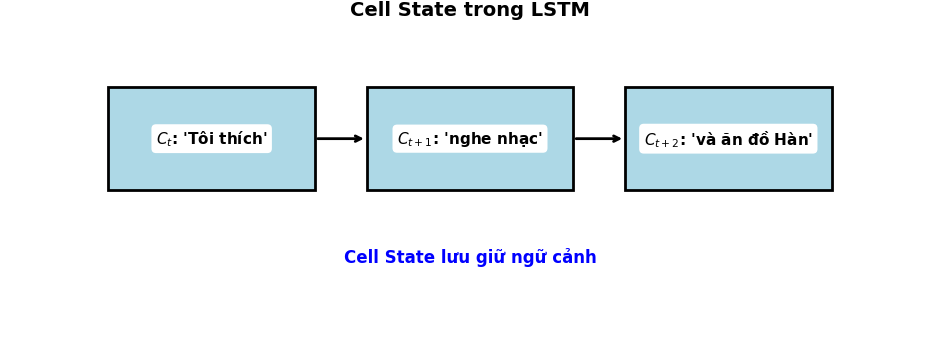

### 2.2. Forget Gate (Cổng quên)

- **Ý tưởng**: Quyết định thông tin nào từ Cell State cần quên đi để không bị quá tải hoặc giữ những thứ không còn liên quan.
- **Công thức**:
  $$ f_t = \sigma(W_f \cdot [h_{t-1}, x_t] + b_f) $$
  - $f_t$: Giá trị cổng quên (từ 0 đến 1), 0 là quên hoàn toàn, 1 là giữ lại hoàn toàn.
  - $\sigma$: Hàm sigmoid, ép giá trị vào khoảng 0-1, giống như công tắc "bật/tắt".
  - $h_{t-1}$: Hidden State từ bước trước (kiến thức ngắn hạn trước đó).
  - $x_t$: Đầu vào hiện tại (ví dụ: từ "xem" trong "tôi thích xem phim").
  - $W_f, b_f$: Trọng số và bias, được học để quyết định điều gì cần quên.

- **Giải thích chi tiết**:
  - $[h_{t-1}, x_t]$ là nối hai vector lại với nhau (concatenation).
  - $W_f \cdot [h_{t-1}, x_t] + b_f$ tính tổng trọng số, rồi qua sigmoid để ra giá trị 0-1.
  - Ví dụ: Nếu $f_t = 0.2$ cho "nghe nhạc" khi gặp "xem phim", LSTM sẽ quên 80% thông tin về "nghe nhạc".

- **Ví dụ**: Nếu câu tiếp theo là "Nhưng hôm nay tôi thích xem phim", LSTM có thể "quên" thông tin về "nghe nhạc" vì không còn liên quan.
- **Hình**

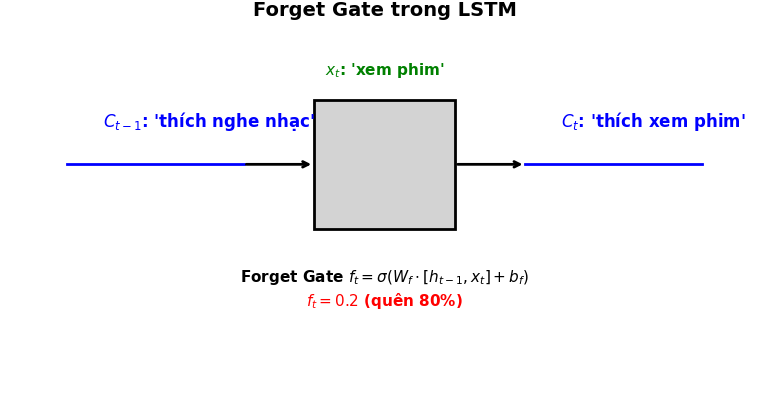

### 2.3. Input Gate (Cổng nhập)

- **Ý tưởng**: Quyết định thông tin mới nào từ đầu vào hiện tại ($x_t$) sẽ được thêm vào Cell State để cập nhật bộ nhớ dài hạn.
- **Công thức**:
  $$ i_t = \sigma(W_i \cdot [h_{t-1}, x_t] + b_i) $$
  $$ \tilde{C}_t = \tanh(W_C \cdot [h_{t-1}, x_t] + b_C) $$
  $$ C_t = f_t \cdot C_{t-1} + i_t \cdot \tilde{C}_t $$
  - $i_t$: Giá trị cổng nhập (0-1), quyết định mức độ thêm thông tin mới.
  - $\tilde{C}_t$: Ứng viên thông tin mới (candidate), là giá trị tiềm năng để thêm vào, nằm trong khoảng -1 đến 1 nhờ hàm $\tanh$.
  - $C_t$: Cell State mới, kết hợp giữa thông tin cũ ($C_{t-1}$) và thông tin mới.
  - $f_t \cdot C_{t-1}$: Phần thông tin cũ được giữ lại sau cổng quên.
  - $i_t \cdot \tilde{C}_t$: Phần thông tin mới được thêm vào.

- **Giải thích chi tiết**:
  - $i_t$ giống như công tắc chọn mức độ cập nhật (0 là không thêm, 1 là thêm hoàn toàn).
  - $\tilde{C}_t$ là nội dung mới được đề xuất, ví dụ: "pop" trong "nghe nhạc pop".
  - $C_t$ là tổng hợp: giữ lại một phần cũ (qua $f_t$) và thêm một phần mới (qua $i_t$).

- **Ví dụ**: Trong "Tôi thích nghe nhạc pop", LSTM thêm "pop" vào Cell State để nhớ sở thích cụ thể, với $i_t$ cao (gần 1) cho "pop".
- **Hình**

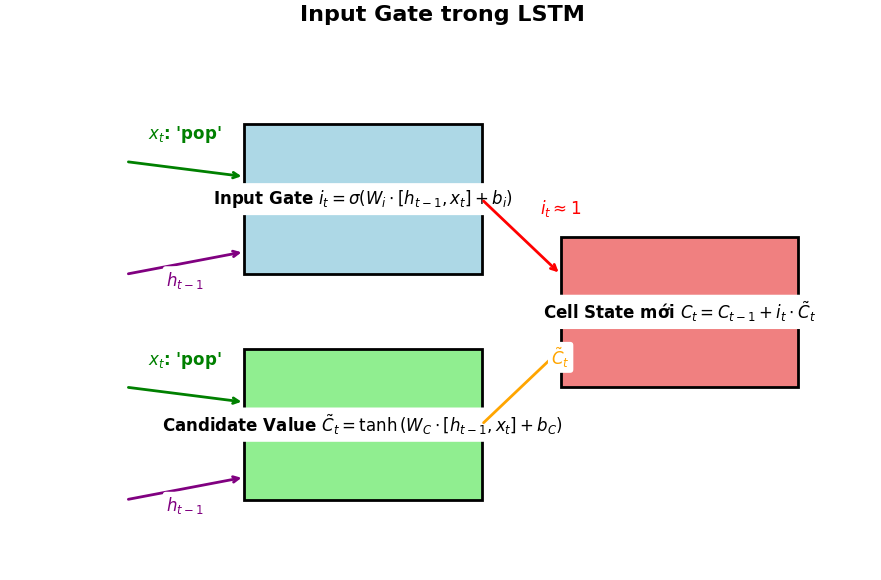

### 2.4. Output Gate (Cổng xuất)

- **Ý tưởng**: Quyết định thông tin nào từ Cell State sẽ được xuất ra làm Hidden State để dự đoán hoặc truyền sang bước tiếp theo.
- **Công thức**:
  $$ o_t = \sigma(W_o \cdot [h_{t-1}, x_t] + b_o) $$
  $$ h_t = o_t \cdot \tanh(C_t) $$
  - $o_t$: Giá trị cổng xuất (0-1), chọn phần nào của Cell State để xuất.
  - $h_t$: Hidden State mới, là đầu ra của bước hiện tại, nằm trong khoảng -1 đến 1 nhờ $\tanh$.
  - $\tanh(C_t)$: Biến đổi Cell State thành giá trị -1 đến 1 trước khi xuất.

- **Giải thích chi tiết**:
  - $o_t$ giống như công tắc chọn lọc thông tin từ $C_t$ để tạo $h_t$.
  - $h_t$ là kết quả cuối cùng của bước này, vừa dùng để dự đoán vừa truyền sang bước sau.
  - Ví dụ: $o_t = 0.9$ cho "nghe" sẽ làm nổi bật "nghe" trong Hidden State.

- **Ví dụ**: Khi dự đoán từ tiếp theo sau "Tôi thích nghe", LSTM dùng Hidden State để đưa ra "nhạc" dựa trên Cell State.
- **Hình**

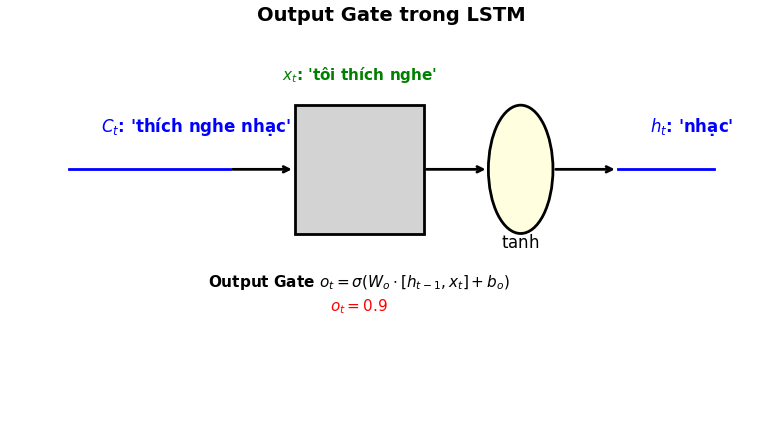

## 3. Quy trình hoạt động của LSTM

1. **Forget Gate**: Loại bỏ thông tin không cần thiết từ $C_{t-1}$ bằng cách nhân với $f_t$.
2. **Input Gate**: Thêm thông tin mới từ $x_t$ vào $C_t$ bằng cách tính $\tilde{C}_t$ và nhân với $i_t$.
3. **Cell State Update**: Cập nhật $C_t$ bằng cách cộng phần giữ lại ($f_t \cdot C_{t-1}$) và phần mới ($i_t \cdot \tilde{C}_t$).
4. **Output Gate**: Tạo $h_t$ từ $C_t$ bằng cách nhân với $o_t$ sau khi qua $\tanh$.

**Ví dụ minh họa**:
- Chuỗi: "Tôi thích nghe nhạc pop".
- **Bước 1**: $x_1 = "Tôi"$, Forget Gate giữ trống ($f_t = 0$) vì chưa có thông tin cũ, $C_0 = 0$.
- **Bước 2**: $x_2 = "thích"$, Input Gate thêm "thích" ($i_t \approx 1$), $C_1$ lưu "thích".
- **Bước 3**: $x_3 = "nghe"$, Forget Gate giữ "thích" ($f_t \approx 1$), Input Gate thêm "nghe" ($i_t \approx 1$), $C_2$ lưu "thích nghe", Output Gate dự đoán "nhạc" ($h_2$).
- **Bước 4**: $x_4 = "pop"$, $C_3$ lưu "thích nghe nhạc pop".

**Hình tổng hợp**

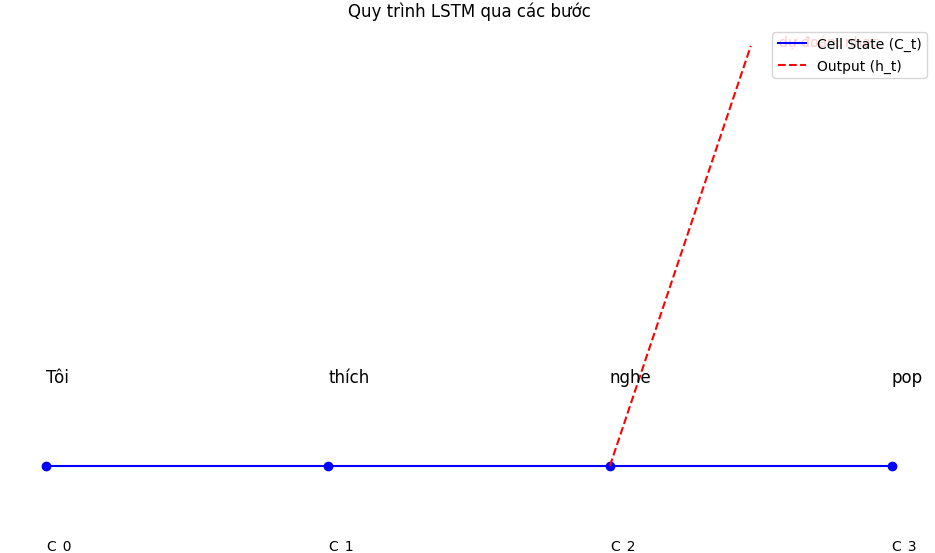

In [35]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Dữ liệu giả lập: từ vựng và câu
vocab = {'I': 1, 'like': 2, 'to': 3, 'music': 4, 'not': 5, 'sad': 6, 'happy': 7}  # Từ điển từ
sentences = [
    ([1, 2, 3, 4], 1),  # "I like to music" -> tích cực (1)
    ([1, 5, 2, 6], 0),  # "I not like sad" -> tiêu cực (0)
    ([1, 2, 7], 1)      # "I like happy" -> tích cực (1)
]
data = [(torch.tensor(seq, dtype=torch.long), torch.tensor(label, dtype=torch.long)) for seq, label in sentences]


In [36]:
# Định nghĩa mô hình LSTM
class SimpleLSTM(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super(SimpleLSTM, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)  # Chuyển từ thành vector
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)  # Tầng LSTM
        self.fc = nn.Linear(hidden_dim, output_dim)  # Tầng fully connected

    def forward(self, text):
        embedded = self.embedding(text)  # Từ -> vector (batch_size, seq_len, embedding_dim)
        output, (hidden, cell) = self.lstm(embedded)  # Qua LSTM, lấy hidden và cell state
        return self.fc(hidden[-1])  # Dùng hidden state cuối cùng để phân loại


In [37]:
# Khởi tạo mô hình
model = SimpleLSTM(vocab_size=len(vocab) + 1, embedding_dim=10, hidden_dim=20, output_dim=2)
optimizer = optim.SGD(model.parameters(), lr=0.1)
criterion = nn.CrossEntropyLoss()

In [38]:
# Huấn luyện mô hình
loss_values = []
for epoch in range(50):
    total_loss = 0
    for seq, label in data:
        optimizer.zero_grad()
        seq = seq.unsqueeze(0)  # Thêm chiều batch
        label = label.unsqueeze(0)  # Thêm chiều batch
        output = model(seq)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    loss_values.append(total_loss / len(data))
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {total_loss / len(data):.4f}")


Epoch 0, Loss: 0.7271
Epoch 10, Loss: 0.4176
Epoch 20, Loss: 0.1678
Epoch 30, Loss: 0.0717
Epoch 40, Loss: 0.0396


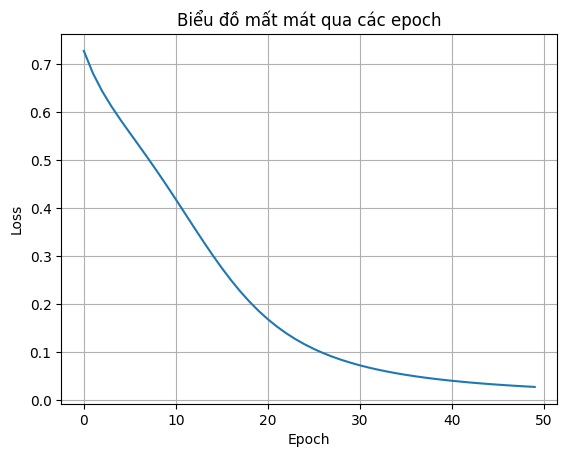

In [39]:
# Vẽ biểu đồ loss
plt.plot(range(50), loss_values)
plt.title("Biểu đồ mất mát qua các epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

In [40]:
# Dự đoán
model.eval()
test_seq = torch.tensor([1, 2, 3, 4], dtype=torch.long).unsqueeze(0)  # "I like to music"
with torch.no_grad():
    pred = model(test_seq)
    _, predicted_label = torch.max(pred, 1)
    print(f"Dự đoán cho 'I like to music': {'Tích cực' if predicted_label.item() == 1 else 'Tiêu cực'}")

Dự đoán cho 'I like to music': Tích cực
